# 지하철 이용객 분석
- https://data.busan.go.kr/
- 승하차 인원정보 검색
- 일별역별시간대별승하차 파일 받기
- 최신 csv 파일로 받기

In [82]:
import pandas as pd
file_path = "dataset/일별역별시간대별승하차인원(2025년1월).csv"
data = pd.read_csv(file_path, encoding='EUC-KR')

In [83]:
columns = ['num', 'name', 'date', 'week', 'type', 'total']
time_col = [f"{i} ~ {i + 1}h" for i in range(1, 24)]
columns = columns + time_col + ['24h ~ 01h']
data.columns = columns
data = data.loc[:,:'total']

In [84]:
group = data.groupby(['num','name','date']).sum().reset_index()
# group[group['date'] == '2025-01-01']
group

,num,name,date,week,type,total
0,95,다대포해수욕장,2025-01-01,수수,승차하차,15800
1,95,다대포해수욕장,2025-01-02,목목,승차하차,8858
2,95,다대포해수욕장,2025-01-03,금금,승차하차,8279
3,95,다대포해수욕장,2025-01-04,토토,승차하차,8477
4,95,다대포해수욕장,2025-01-05,일일,승차하차,6912
...,...,...,...,...,...,...
3467,414,안평,2025-01-27,월월,승차하차,2716
3468,414,안평,2025-01-28,화화,승차하차,1987
3469,414,안평,2025-01-29,수수,승차하차,1633
3470,414,안평,2025-01-30,목목,승차하차,2037


In [96]:
gdata = group[['name','date','total']]
gdata = gdata.sort_values(by=['name'],ascending=True)
gdata

,name,date,total
1882,가야,2025-01-23,7767
1890,가야,2025-01-31,6806
1889,가야,2025-01-30,3527
1888,가야,2025-01-29,3112
1887,가야,2025-01-28,3893
...,...,...,...
2321,화명,2025-01-28,10076
2322,화명,2025-01-29,6845
2323,화명,2025-01-30,10271
2294,화명,2025-01-01,10496


In [103]:
ndata = gdata.groupby(['name']).sum().reset_index()
ndata = ndata[['name','total']]

In [105]:
Final = ndata.sort_values(by = 'total',ascending=False)
Final.head(10)

,name,total
70,서면,3626209
83,연산,1500575
61,부산역,1337149
65,사상,1230792
36,동래,1089751
72,센텀시티,1083780
88,자갈치,1070458
23,남포,1045512
64,부전,1008329
104,하단,1003733


In [112]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

d2_path = 'dataset/D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2_path)
plt.rcParams["font.family"] = "D2Coding"

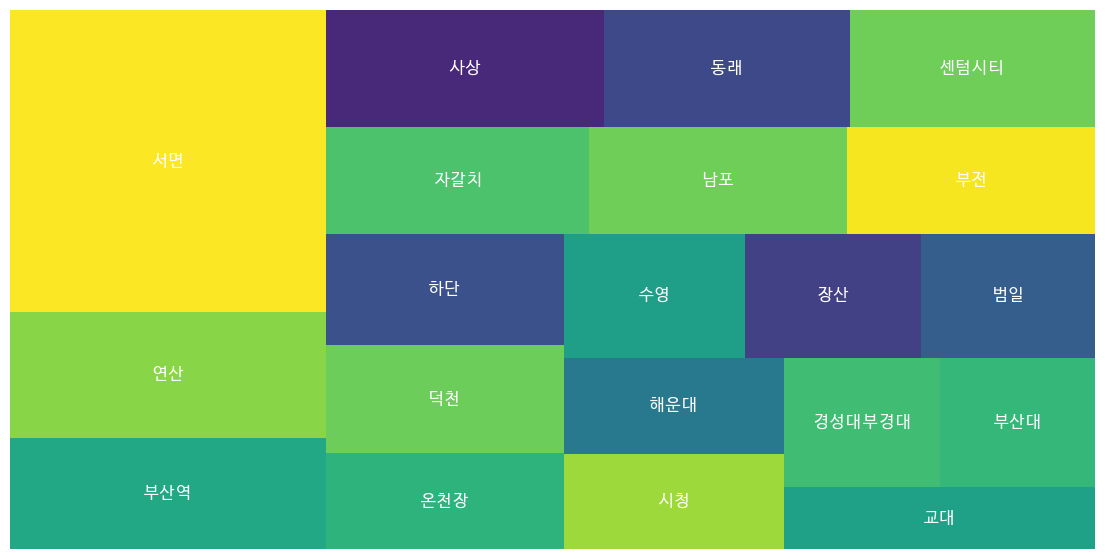

In [138]:
import squarify
plt.figure(figsize=(14,7))
squarify.plot(sizes = Final['total'].iloc[:20], label = Final['name'].iloc[:20], alpha = 1)
plt.rcParams["font.size"] = 12
plt.rcParams["text.color"] = 'white'
plt.gca().invert_yaxis()
plt.axis("off")
plt.show()